In [29]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [19]:
# fix random seed reproduction
seed = 7
numpy.random.seed(seed)

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], pixels).astype('float32')

In [22]:
# normalize data
X_train = X_train / 255
X_test = X_test / 255

In [23]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [24]:
def model_base():
    model = Sequential()
    model.add(Dense(pixels, input_dim=pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
model = model_base()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2791 - acc: 0.9209 - val_loss: 0.1422 - val_acc: 0.9570
Epoch 2/10
 - 7s - loss: 0.1118 - acc: 0.9677 - val_loss: 0.0923 - val_acc: 0.9708
Epoch 3/10
 - 7s - loss: 0.0718 - acc: 0.9794 - val_loss: 0.0794 - val_acc: 0.9770
Epoch 4/10
 - 7s - loss: 0.0503 - acc: 0.9860 - val_loss: 0.0750 - val_acc: 0.9767
Epoch 5/10
 - 7s - loss: 0.0375 - acc: 0.9892 - val_loss: 0.0676 - val_acc: 0.9792
Epoch 6/10
 - 8s - loss: 0.0270 - acc: 0.9927 - val_loss: 0.0637 - val_acc: 0.9801
Epoch 7/10
 - 7s - loss: 0.0208 - acc: 0.9945 - val_loss: 0.0624 - val_acc: 0.9812
Epoch 8/10
 - 7s - loss: 0.0144 - acc: 0.9968 - val_loss: 0.0636 - val_acc: 0.9806
Epoch 9/10
 - 7s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0595 - val_acc: 0.9811
Epoch 10/10
 - 10s - loss: 0.0081 - acc: 0.9983 - val_loss: 0.0601 - val_acc: 0.9813
Error: 1.87%


## Demo

In [62]:
import matplotlib.pyplot as plt

Image number 3420 is a 1, model predicted it is a 1


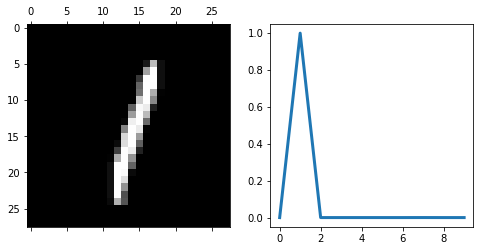

In [63]:
imgnr = np.random.randint(0, 10000)
predictions = model.predict(X_test)
prediction = predictions[imgnr]
print("Image number {0} is a {1}, model predicted it is a {2}".format(imgnr, np.argmax(y_test[imgnr]) , np.argmax(prediction)))
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].matshow(np.reshape(X_test[imgnr], (28, 28)), cmap='gray')
ax[1].plot(prediction, lw=3)
ax[1].set_aspect(9)
plt.show()